# Исследование объявлений о продаже квартир



# Описание проекта
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Описание данных
-  airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-  balcony — число балконов
-  ceiling_height — высота потолков (м)
-  cityCenters_nearest — расстояние до центра города (м)
-  days_exposition — сколько дней было размещено объявление (от публикации до снятия)
-  first_day_exposition — дата публикации
-  floor — этаж
-  floors_total — всего этажей в доме
-  is_apartment — апартаменты (булев тип)
-  kitchen_area — площадь кухни в квадратных метрах (м²)
-  last_price — цена на момент снятия с публикации
-  living_area — жилая площадь в квадратных метрах (м²)
-  locality_name — название населённого пункта
-  open_plan — свободная планировка (булев тип)
-  parks_around3000 — число парков в радиусе 3 км
-  parks_nearest — расстояние до ближайшего парка (м)
-  ponds_around3000 — число водоёмов в радиусе 3 км
-  ponds_nearest — расстояние до ближайшего водоёма (м)
-  rooms — число комнат
-  studio — квартира-студия (булев тип)
-  total_area — общая площадь квартиры в квадратных метрах (м²)
-  total_images — число фотографий квартиры в объявлении

## 1. Откройте файл с данными и изучите общую информацию. 

### 1.1 Загрузим данные

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np





In [9]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

### 1.2  Изучим общую информацию 

In [11]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### 1.3 Построим гистрограммы по всем данным датафрейма.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

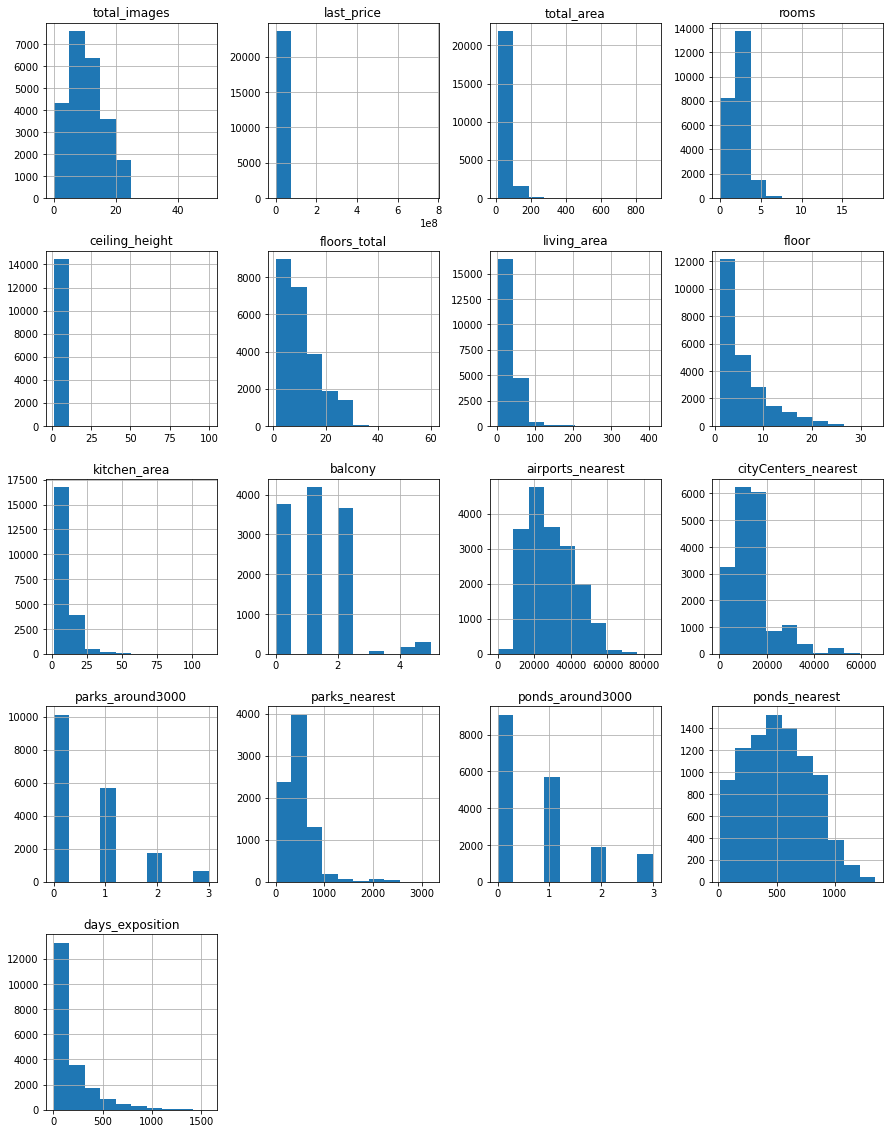

In [3]:
data.hist(figsize=(15, 20))

Изучив общую информацию, можно сказать,что тип данны в столбцах first_day_exposition и last_price не соответсвут содержимому ячеек.

### 2. Предобработка данных

**Проверим данные на наличие дубликатов**

In [15]:
data.duplicated().sum()

0

**Проверим данные на наличие пропусков**

In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Комментарий.** В исследуемом датафрейме найдены пропуски в столбцах.

**Изменим тип данных в столбцах.**

In [19]:
data['last_price ']=data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')



**Заполним пропуски**

In [20]:
data['is_apartment']=data['is_apartment'].fillna(value=False)
data['balcony']=data['balcony'].fillna(value=0).astype(int)
data['parks_around3000']=data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000']=data['ponds_around3000'].fillna(value=0).astype(int)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
last_price                  0
dtype: int64

Изменили тип данных в столбцах:last_price,balcony,parks_around3000,ponds_around3000. Так как согласно условиям наших данных они должны быть целыми числами. И преобразовали дату на более понятный нам формат.

In [22]:
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)


In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
last_price                  0
dtype: int64

К пропускам в столбцах, заполняемых людьми могло привести то что люди не указали некоторые параметры своих квартир, а во втором типе данных, пропуски могли появиться при выгрузке.

In [6]:
living_fraction= data['living_area'].mean() / data['total_area'].mean()
kitchen_fraction = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_fraction * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_fraction * data['total_area'], inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
last_price                  0
dtype: int64

**Проверим данные на неявные дубликаты**

In [7]:
data['locality_name']=data['locality_name'].str.lower()
data['locality_name'].unique()
data['locality_name']=data['locality_name'].str.replace("поселок", "посёлок")
data['locality_name']=data['locality_name'].replace('поселок городского типа', 'городской посёлок',regex=True)
data['locality_name'].sort_values().unique()



array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской посёлок большая ижора',
       'городской посёлок будогощь', 'городской посёлок виллози',
       'городской посёлок лесогорский', 'городской посёлок мга',
       'городской посёлок назия', 'городской посёлок новоселье',
       'городской посёлок павлово', 'городской посёлок рощино',
       'городской посёлок свирьстрой', 'городской посёлок советский',
       'городской посёлок фёдоровское', 'городской посёлок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

In [8]:
len(data)

23699

In [9]:
percentage_of_skips=(data.isna().sum()/len(data))*100
value_data = pd.DataFrame({'column_name': data.columns,
                                'percentage_of_skips':percentage_of_skips})
value_data.sort_values(by='percentage_of_skips').round(2)

,column_name,percentage_of_skips
total_images,total_images,0.00
ponds_around3000,ponds_around3000,0.00
parks_around3000,parks_around3000,0.00
balcony,balcony,0.00
kitchen_area,kitchen_area,0.00
studio,studio,0.00
is_apartment,is_apartment,0.00
floor,floor,0.00
open_plan,open_plan,0.00
ceiling_height,ceiling_height,0.00


In [10]:
data.describe()
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)
data['rooms'] = data['rooms'].fillna(0).astype(int)

## 3. Посчитаем и добавим в таблицу новые столбцы

In [11]:
data['prise_m_2']=data['last_price']/data['total_area']
data['prise_m_2']=data['prise_m_2']
data['weekday']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=data['first_day_exposition'].dt.year
def category_floor(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['category_floor']=data.apply(category_floor,axis=1)
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(value=0)
data['cityCenters_nearest_km']=data['cityCenters_nearest']/1000
data['cityCenters_nearest_km']=data['cityCenters_nearest_km'].astype(int)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,last_price,prise_m_2,weekday,month,year,category_floor,cityCenters_nearest_km
0,20,NaN,108.00,2019-03-07,3,2.700,16.0,51.000000,8,False,...,2,755.0,NaN,13000000,NaN,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,2.650,11.0,18.600000,1,False,...,0,NaN,81.0,3350000,82920.792079,1,12,2018,первый,18
2,10,5196000.0,56.00,2015-08-20,2,2.600,5.0,34.300000,4,False,...,2,574.0,NaN,5196000,92785.714286,3,8,2015,другой,13
3,0,NaN,NaN,2015-07-24,3,2.600,14.0,NaN,9,False,...,3,234.0,424.0,64900000,NaN,4,7,2015,другой,6
4,2,10000000.0,100.00,2018-06-19,2,3.030,14.0,32.000000,13,False,...,1,48.0,121.0,10000000,100000.000000,1,6,2018,другой,8
5,10,2890000.0,30.40,2018-09-10,1,2.625,12.0,14.400000,5,False,...,0,NaN,55.0,2890000,95065.789474,0,9,2018,другой,0
6,6,3700000.0,37.30,2017-11-02,1,2.600,26.0,10.600000,6,False,...,0,NaN,155.0,3700000,99195.710456,3,11,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,2.750,24.0,40.882144,22,False,...,0,NaN,NaN,7915000,110544.692737,3,4,2019,другой,11
8,20,2900000.0,33.16,2018-05-23,1,2.650,27.0,15.430000,26,False,...,0,NaN,189.0,2900000,87454.764777,2,5,2018,другой,0
9,18,5400000.0,61.00,2017-02-26,3,2.500,9.0,43.600000,7,False,...,0,NaN,289.0,5400000,88524.590164,6,2,2017,другой,15


Пропуски могут появиться из-за того что люд  не внесли данные по квартирам, а также при выгрузке 


## 4. Проведем исследовательский анализ данных

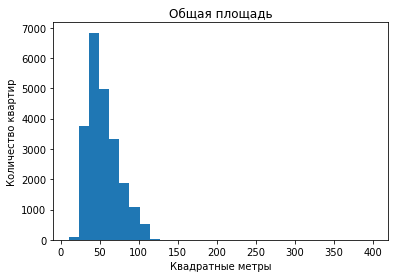

Наибольшие по площади варианты:
20809    114.60
12831    114.60
18273    114.55
16094    114.50
1966     114.40
13686    114.30
19491    114.30
20477    114.20
5978     114.20
1170     114.20
Name: total_area, dtype: float64


In [12]:
plt.hist(data['total_area'], bins=30, range=(10,400))
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В выборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров.

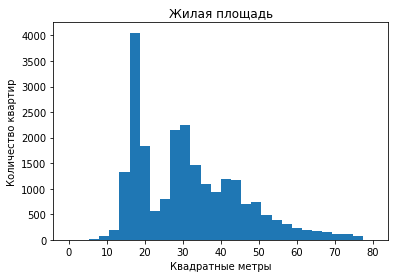

Наибольшие по площади варианты:
8470     76.700000
18109    76.650000
7091     76.511275
8533     76.511275
14540    76.511275
8933     76.500000
16618    76.500000
12604    76.400000
13088    76.400000
688      76.400000
Name: living_area, dtype: float64


In [13]:
plt.hist(data['living_area'], bins=30, range=(0, 80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))


Самые распространённые варианты с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

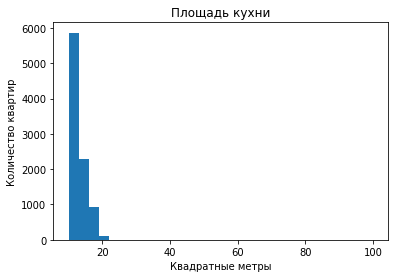

Наибольшие по площади варианты:
9448     19.450000
16505    19.441174
8286     19.420000
8901     19.400000
9723     19.400000
6721     19.400000
15365    19.400000
3056     19.400000
14212    19.400000
417      19.400000
Name: kitchen_area, dtype: float64


In [14]:
plt.hist(data['kitchen_area'], bins=30, range=(10,100))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

Самые распространённые кухни - от 5 до 15 метров. Больше 20 метров кухни практически не встречаются. Больше 30 - единичные случаи.

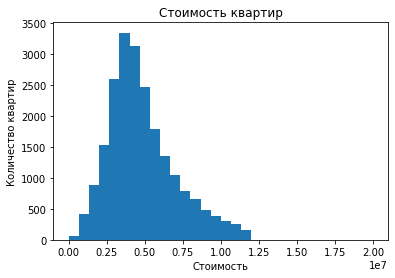

Наибольшие по цене варианты:
17738    11894400.0
13701    11880000.0
20860    11879250.0
3165     11866860.0
21860    11858000.0
12437    11850000.0
10068    11840000.0
19454    11820000.0
20193    11809670.0
4973     11800000.0
Name: last_price, dtype: float64


In [15]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

В основном стоимость квартир - в районе 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже

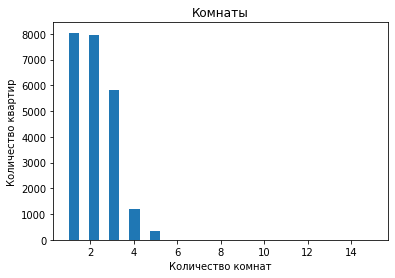

Наибольшие по числу комнат варианты:
3267     5
1187     5
17978    5
8574     5
8933     5
11835    5
19949    5
22195    5
12326    5
11847    5
Name: rooms, dtype: int64


In [16]:
plt.hist(data['rooms'], bins=30, range=(1,15))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))


В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно.

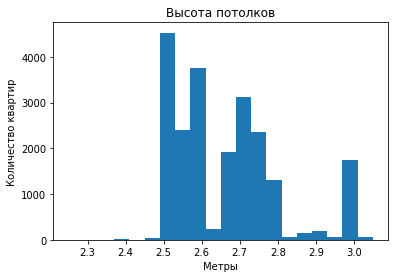

Наибольшие по высоте потолков варианты:
8455     3.05
11084    3.05
22326    3.05
8842     3.05
14212    3.05
13421    3.05
17037    3.05
359      3.05
8322     3.05
6151     3.05
Name: ceiling_height, dtype: float64


In [17]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит подозрительно. 

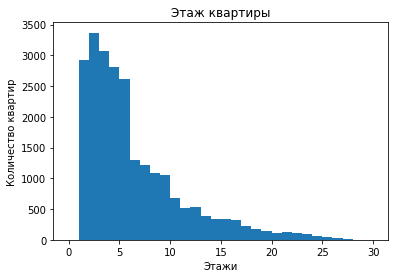

Наибольшие по количесву этажей  варианты:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
8496     27
16644    27
12888    27
6157     27
Name: floor, dtype: int64


In [18]:
plt.hist(data['floor'], bins=30, range=(0,30))
plt.title('Этаж квартиры')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количесву этажей  варианты:')
print(data['floor'].sort_values(ascending=False).head(10))

Большинство квартир находятся на 1-5 этажах. Больше 4 метров высота потолков выглядит подозрительно.  

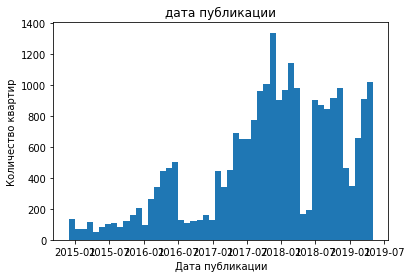

Наибольшие варианты по дате публикации:
12003   2019-05-03
14246   2019-05-03
3254    2019-05-03
12343   2019-05-03
5986    2019-05-03
12380   2019-05-03
13993   2019-05-03
17551   2019-05-03
8170    2019-05-03
9217    2019-05-03
Name: first_day_exposition, dtype: datetime64[ns]


In [19]:
plt.hist(data['first_day_exposition'], bins=50,)
plt.title('дата публикации')
plt.xlabel('Дата публикации')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие варианты по дате публикации:')
print(data['first_day_exposition'].sort_values(ascending=False).head(10))

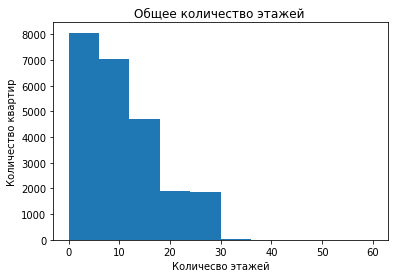

Наибольшие варианты по этажам:
2253     60.0
16731    52.0
16934    37.0
397      36.0
5807     36.0
11079    36.0
4855     35.0
18617    35.0
5808     35.0
13975    35.0
Name: floors_total, dtype: float64


In [20]:
plt.hist(data['floors_total'], bins=10,range=(0,60))
plt.title('Общее количество этажей ')
plt.xlabel('Количесво этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие варианты по этажам:')
print(data['floors_total'].sort_values(ascending=False).head(10))

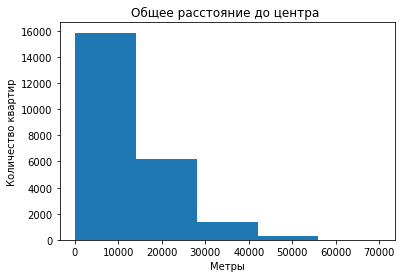

Наибольшие варианты по расстоянию от центра:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: cityCenters_nearest, dtype: float64


In [21]:
plt.hist(data['cityCenters_nearest'], bins=5,range=(0,70000))
plt.title('Общее расстояние до центра ')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие варианты по расстоянию от центра:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))

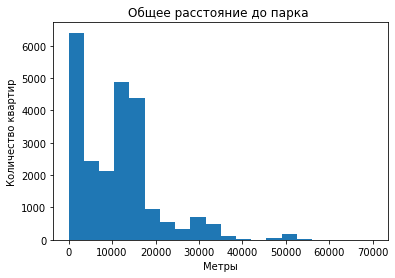

Наибольшие варианты по расстоянию от центра:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: cityCenters_nearest, dtype: float64


In [22]:
plt.hist(data['cityCenters_nearest'], bins=20,range=(0,70000))
plt.title('Общее расстояние до парка ')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие варианты по расстоянию от центра:')
print(data['cityCenters_nearest'].sort_values(ascending=False).head(10))

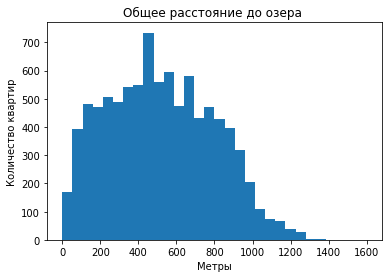

Наибольшие варианты по расстоянию от озера:
20726    1344.0
19924    1341.0
19138    1341.0
1476     1337.0
12054    1313.0
18396    1299.0
21454    1293.0
20509    1278.0
14927    1278.0
4122     1275.0
Name: ponds_nearest, dtype: float64


In [23]:
plt.hist(data['ponds_nearest'], bins=30,range=(0,1600))
plt.title('Общее расстояние до озера ')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие варианты по расстоянию от озера:')
print(data['ponds_nearest'].sort_values(ascending=False).head(10))

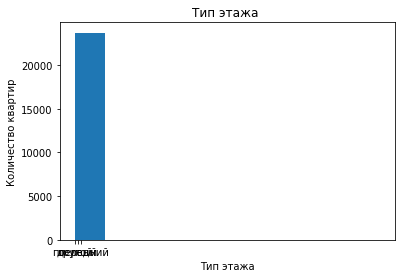

Наибольшие варианты по типу этажа:
20726    1344.0
19924    1341.0
19138    1341.0
1476     1337.0
12054    1313.0
18396    1299.0
21454    1293.0
20509    1278.0
14927    1278.0
4122     1275.0
Name: ponds_nearest, dtype: float64


In [24]:
plt.hist(data['category_floor'], bins=10,range=(0,100))
plt.title('Тип этажа ')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие варианты по типу этажа:')
print(data['ponds_nearest'].sort_values(ascending=False).head(10))

Время продажи (медиана): 85 

Время продажи (среднее): 129 



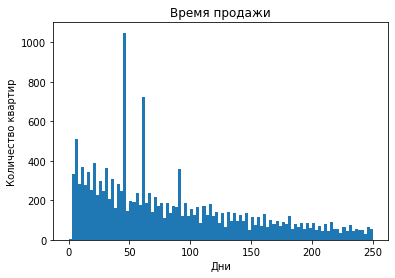

count    18849.000000
mean       128.753886
std        121.531193
min          1.000000
25%         41.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

In [25]:
data['days_exposition'].fillna(1111, inplace=True)
data['days_exposition'] = data['days_exposition'].astype(int)
print('Время продажи (медиана):', round(data.query('days_exposition != 1111')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 1111')['days_exposition'].mean()),'\n')
plt.hist(data.query('days_exposition != 1111')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
data.query('days_exposition != 1111')['days_exposition'].describe()

Среднее время продажи квартир составило примерно 100 дней. Но также есть квартиры, которые были куплены в первый день размещения объявления, а также есть квартиры которые в срок больше 200 дней.

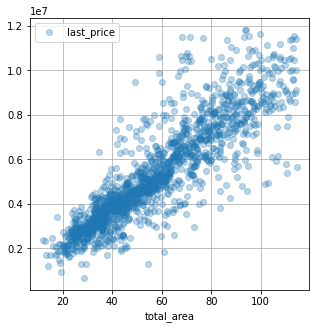

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.905255
total_area    0.905255    1.000000 



In [26]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5),alpha=0.3)

plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')


Из данного графика мы видим что корреляция данных параметров высока, таким образом чем больше площадь тем выше цена.

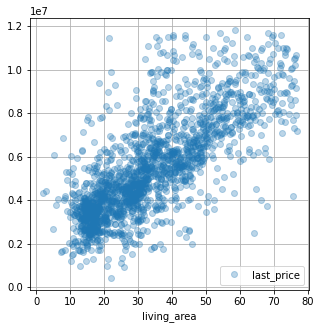

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.729934
living_area    0.729934     1.000000 



In [27]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5),alpha=0.3)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Из данного графика видно, что зависимоть есть но средняя . Поэтому этот показатель не сильно влияет на цену.

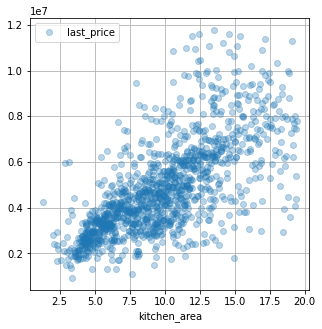

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.445498
last_price        0.445498    1.000000 



In [28]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5),alpha=0.3)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

Из данного графика видно, что корреляция не высокая, таком образом площадь кухни не влияет на ценовую политику квартиры.

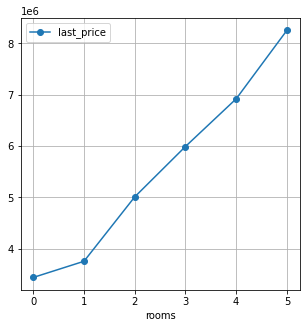

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.563737
rooms         0.563737  1.000000 



In [29]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')


Из данного графика, видно что корреляция не высокая, соответсвенно число комнат не влияте на увеличение цены.

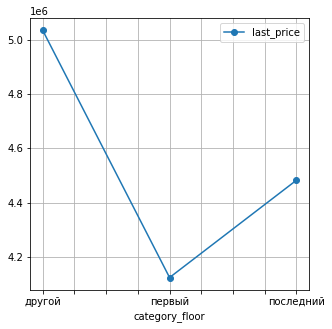

Корреляция цены и типа расположение этажа: 

            last_price
last_price         1.0 



In [30]:
data.pivot_table(index='category_floor', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и типа расположение этажа:','\n')
print(data.pivot_table(index='floor', values=['category_floor', 'last_price']).corr(),'\n')

Из графика можно сделать следующий вывод, что наиболее дешевые квартиры находяться на первом этаже. Чуть выше ценовая политика квартир на последнем этаже. А самые дорогие квартиры, которые находятся в промежутке между первым о последним этажом.

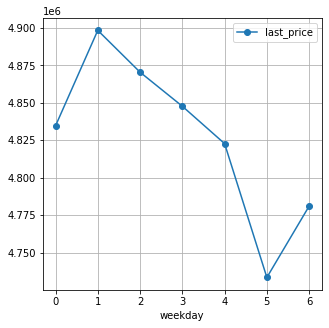

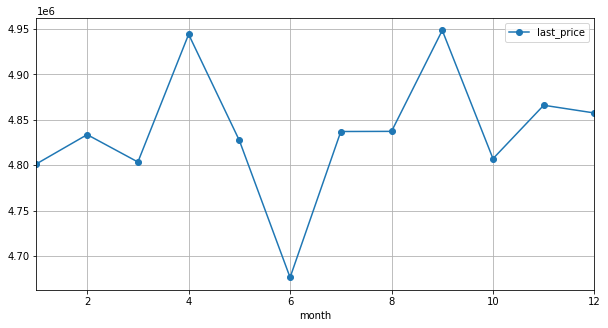

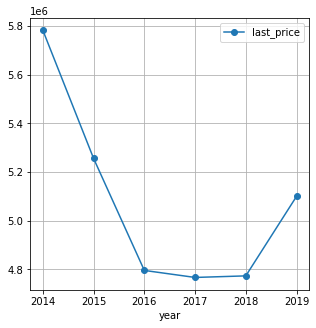

In [31]:
data.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()


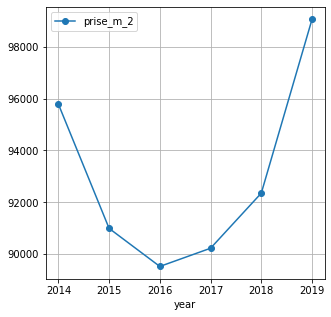

In [32]:
data.pivot_table(index='year', values='prise_m_2').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

Проанализировав данные графики, можно сделать следующие выводы: что самые дорогие квартиры выложены были в субботу, а дешевые в воскресенье.
Если рассматривать месяца, то более дорогие варианты были выложены в декабре, а более дешевые варианты в октябре.
Также если посмотреть по годам, с 2014-2016год шел спад цен на квартиры, а начиная с 2018 года наблюдается рост, это может быть обусловлено экономическимициклами(кризисом и подъёмом экономики), тоже самое происходит и с ценой за квадратный метр.

In [33]:
city_1 = data['locality_name'].value_counts().head(10)
city_last_price = data.query('locality_name in (@city_1.index)').pivot_table(values='prise_m_2', index='locality_name')
city_last_price = city_last_price.astype(int)
city_last_price.sort_values('prise_m_2', ascending=False)


,prise_m_2
locality_name,
санкт-петербург,105684
пушкин,100462
деревня кудрово,92409
посёлок парголово,90332
посёлок мурино,85681
посёлок шушары,78704
колпино,75221
гатчина,68664
всеволожск,67222


<AxesSubplot:xlabel='locality_name'>

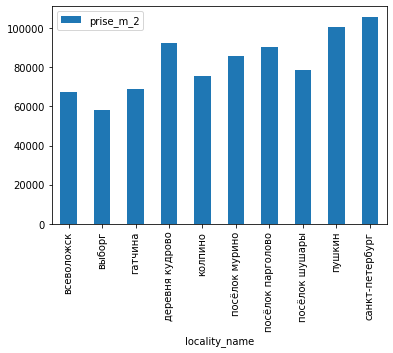

In [34]:
city_last_price.plot(kind='bar')

Самый дорогой квадратный метр в Санкт-Петербурге так как он является центром. на втором месте Пушкин, более высокий ценник может быть обусловлен хорошо развитой инфраструктурой, большим обилиеем исторических мест и парковю После идут районы примыкающие к Санкт-Петербургу и находятся на не большой удаленности от города. Гатчина и  Всеволжск находятся на более далеком расстояниии от  центра,этим и обуславливает ниже цену на квадратный метр. Выборг является саммы низким по цене за квадратный метр это обусловлено тем что он далнко находиться от Санкт-Петербурга. 

<AxesSubplot:xlabel='center_km'>

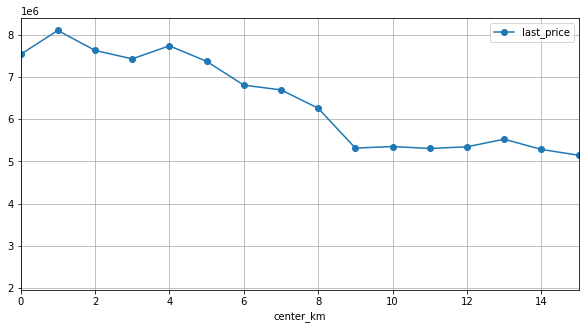

In [35]:
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)
data.query('locality_name=="санкт-петербург"').pivot_table(index='center_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))


Из графика видно, что примерно на 7 км начинается падение цены, таким образом центральная зоня является все что меньше либо равно 7 км.

Общая (медиана): 52 

Общая площадь в центре (медиана): 68 

Общая площадь (среднее): 57 

Общая площадь в центре (среднее): 69 



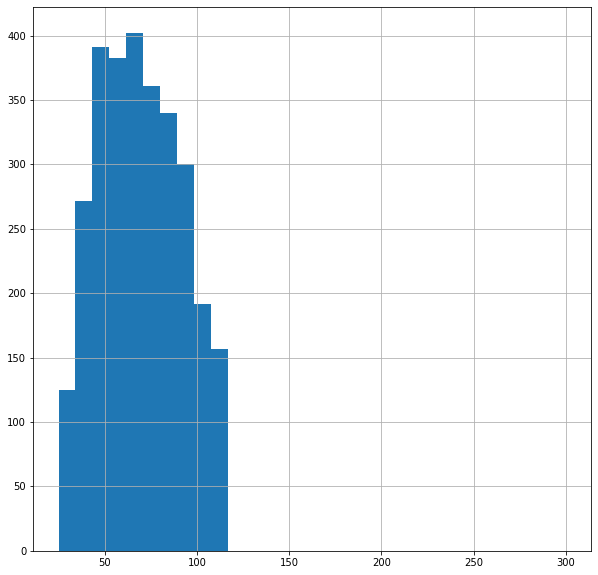

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4937,32.006483,581,16.183844,12.0
2,5106,33.102107,1119,31.169916,22.0
3,4123,26.729335,1165,32.451253,28.0
4,968,6.275527,504,14.038997,52.0
5,291,1.886548,221,6.155989,76.0


Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.77 

Высота потолков (среднее): 2.6790393306030222 

Высота потолков в центре (среднее): 2.7902267303102626 

Цена в центре (медиана): 7300000.0
Цена (медиана): 5150000.0
Цена в центре (среднее): 7375483.295326349
Цена (среднее): 5663712.735240591


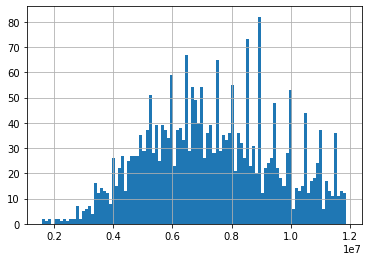

In [36]:
spb_center = data.query('(locality_name == "санкт-петербург") & (center_km <= 7)')
print('Общая (медиана):', round(data.query('locality_name == "санкт-петербург"')['total_area'].median()),'\n')
print('Общая площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Общая площадь (среднее):', round(data.query('locality_name == "санкт-петербург"')['total_area'].mean()),'\n')
print('Общая площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()
spb_rooms = data.query('(locality_name == "санкт-петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = data.query('(locality_name == "санкт-петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
display(rooms_alldata)
print('Высота потолков (медиана):', data.query('locality_name == "санкт-петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "санкт-петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')
spb_center['last_price'].hist(bins=100)
print('Цена в центре (медиана):', spb_center['last_price'].median())
print('Цена (медиана):', data.query('locality_name == "санкт-петербург"')['last_price'].median())
print('Цена в центре (среднее):', spb_center['last_price'].mean())
print('Цена (среднее):', data.query('locality_name == "санкт-петербург"')['last_price'].mean())

Площадь квартир в центре значительно больше, чем в целом по городу - в среднем на14 метров. Также в центре находится большое число квартир с площадью 100 квадратных метров и более. Высота потолков в центре также больше примерно на 12 см. Также цена в центре выше в центре, это обусловлено тем что общая площадь больше. По количесву комнат, можно сделать следующие выводы, что в центре  меньше доля однокомнатных квартир, большего всего доля 4-5 комнатных квартир.

## 5. Общий вывод

#Обработка данных.
В ходе исследования мы нашли пропуски в данных. Проруски в столбце: балконы, парки в 3000, водоёмы в 3000, мы заменили на ноль. Высоту потолков заменили на медианное значение по группе домов с одинаковой этажностью. Была произведена замена строк на нижний регистр, а также переведены значения в целочисленные, где это было необходимо. Были убраны единичные выбросы по следующим столбцам:
- цена;
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;

Добавила в таблицу следующие расчеты:
- стоимость квадратного метра;
- расстояние до центра в км;
- дата публикации;
- месяц публикации;
- год публикации;
- варианты этажей квартиры.

В ходе исследования была установлено среднее значение продажи квартир(100 дней.).Также выявлены значени, которые считаются быстрой продажей(за 1 день), а необычно долгими продажами квартир считается свыше 450 дней.

Выявили зависимость цены квартры  от ее раположения по этажам.Недорогие квартиры расположены на 1 этаже. Квартиры подороже находятся на последнем этаже, а самые дорогие в середине между 1 и последним этажом.Также были исследоованы дни в которые размещались объявления п проюдажи квартир с самой высокой(суббота) и низкой(воскресенье) стоимость.Изучила месяца размещения объявлений наиболее дорогих(декабрь) и дешевых(октябрь) квартир. Мною была изучена динамика цен на недвижимость по годам. С 2014 по 2016 год происходит падение цен на жильеэто может обусловено кризисом, а с 2018 по 2019 года наблюдается резкий подъём цен на квартиры.

В результате исследования была выявлена высокая зависимость цены от  общей жилой площади об этом свидетельсвует высокий коэффицент корреляции(0.73).
 
Также на стоимость квадратного метра влияет расположенние квартиры в зависимости от населенного пункта, таком образом самый дорогой квадратный метр в Санкт-Петербурге(114748)и самый дешевый в Выборге(58141).
Мною выявлена была зависимость цены квартиры, общей площади, количесво комнат и высота потолков от расположения к центру. Квартиры расположенные в центре дороже в 1.5 раза дороже, также в центре расположено больше 5 комнатных кварит и меньше однокомнатых квартир и сосотвесвенно выше жилоая площадь.

Таким образом, ключевыми факторами на ценообразование можно счмитать населенный пункт в котором располагается, общая площадь и раположенность от центра.





